In [1]:
# source
# https://www.kaggle.com/edhenrivi/introduction-classification-sonar-dataset

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## First look at the csv file

Using Pandas library as pd we use the method [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to open the file and take a look at how the data is displayed.

In [2]:
pd.read_csv('sonar.all-data.csv')

0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
5    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
6    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
7    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
8    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
9    0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
10   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.0579  0.1122   
11   0.0079  0.0086  0.0055  0.0250  0.0344  0.0546  0.0528  0.0958  0.1009   
12   0.0090  0.0062  0.0253  0.0489  0.1197  0.1589  0.1392  0.0987  0.0955   
13   0.0124  0.0433  0.0604  0.0449  0.0597  0.0355  0.0531  0.0343  0.1052   
14   0.0298  0.0615  0.0650  0.0921  0.1615  0.2294  0.2176  0.2033  0.1459   
15   0.0352  0.0116  0.0191  0.0469  0.0737  0.1185  0.1683  0.1541  0.1466   
16   0.0192  0.0607  0.0378  0.0774  0.1388  0.0809  0.0568  0.0219  0.1037   
17   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
18   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
19   0.0473  0.0509  0.0819  0.1252  0.1783  0.3070  0.3008  0.2362  0.3830   
20   0.0664  0.0575  0.0842  0.0372  0.0458  0.0771  0.0771  0.1130  0.2353   
21   0.0099  0.0484  0.0299  0.0297  0.0652  0.1077  0.2363  0.2385  0.0075   
22   0.0115  0.0150  0.0136  0.0076  0.0211  0.1058  0.1023  0.0440  0.0931   
23   0.0293  0.0644  0.0390  0.0173  0.0476  0.0816  0.0993  0.0315  0.0736   
24   0.0201  0.0026  0.0138  0.0062  0.0133  0.0151  0.0541  0.0210  0.0505   
25   0.0151  0.0320  0.0599  0.1050  0.1163  0.1734  0.1679  0.1119  0.0889   
26   0.0177  0.0300  0.0288  0.0394  0.0630  0.0526  0.0688  0.0633  0.0624   
27   0.0100  0.0275  0.0190  0.0371  0.0416  0.0201  0.0314  0.0651  0.1896   
28   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
29   0.0240  0.0218  0.0324  0.0569  0.0330  0.0513  0.0897  0.0713  0.0569   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
177  0.0197  0.0394  0.0384  0.0076  0.0251  0.0629  0.0747  0.0578  0.1357   
178  0.0394  0.0420  0.0446  0.0551  0.0597  0.1416  0.0956  0.0802  0.1618   
179  0.0310  0.0221  0.0433  0.0191  0.0964  0.1827  0.1106  0.1702  0.2804   
180  0.0423  0.0321  0.0709  0.0108  0.1070  0.0973  0.0961  0.1323  0.2462   
181  0.0095  0.0308  0.0539  0.0411  0.0613  0.1039  0.1016  0.1394  0.2592   
182  0.0096  0.0404  0.0682  0.0688  0.0887  0.0932  0.0955  0.2140  0.2546   
183  0.0269  0.0383  0.0505  0.0707  0.1313  0.2103  0.2263  0.2524  0.3595   
184  0.0340  0.0625  0.0381  0.0257  0.0441  0.1027  0.1287  0.1850  0.2647   
185  0.0209  0.0191  0.0411  0.0321  0.0698  0.1579  0.1438  0.1402  0.3048   
186  0.0368  0.0279  0.0103  0.0566  0.0759  0.0679  0.0970  0.1473  0.2164   
187  0.0089  0.0274  0.0248  0.0237  0.0224  0.0845  0.1488  0.1224  0.1569   
188  0.0158  0.0239  0.0150  0.0494  0.0988  0.1425  0.1463  0.1219  0.1697   
189  0.0156  0.0210  0.0282  0.0596  0.0462  0.0779  0.1365  0.0780  0.1038   
190  0.0315  0.0252  0.0167  0.0479  0.0902  0.1057  0.1024  0.1209  0.1241   
191  0.0056  0.0267  0.0221  0.0561  0.0936  0.1146  0.0706  0.0996  0.1673   
192  0.0203  0.0121  0.0380  0.0128  0.0537  0.0874  0.1021  0.0852  0.1136   
193  0.0392  0.0108  0.0267  0.0257  0.0410  0.0491  0.1053  0.1690  0.2105   
194  0.0129  0.0141  0.0309  0.0375  0.0767  0.0787  0.0662  0.1108  0.1777   
195  0.0050  0.0017  0.0270  0.0450  0.0958  0.0830  0.

1. This data has no header, so we must open it using the parameter header=None parameter.

2. There are 207 observations with 61 columns, and the last column is the data we wish to predict.

In [3]:
main_df = pd.read_csv('sonar.all-data.csv',header=None)
main_df

0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6    0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7    0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8    0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9    0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10   0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11   0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.0579  0.1122   
12   0.0079  0.0086  0.0055  0.0250  0.0344  0.0546  0.0528  0.0958  0.1009   
13   0.0090  0.0062  0.0253  0.0489  0.1197  0.1589  0.1392  0.0987  0.0955   
14   0.0124  0.0433  0.0604  0.0449  0.0597  0.0355  0.0531  0.0343  0.1052   
15   0.0298  0.0615  0.0650  0.0921  0.1615  0.2294  0.2176  0.2033  0.1459   
16   0.0352  0.0116  0.0191  0.0469  0.0737  0.1185  0.1683  0.1541  0.1466   
17   0.0192  0.0607  0.0378  0.0774  0.1388  0.0809  0.0568  0.0219  0.1037   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
19   0.0126  0.0149  0.0641  0.1732  0.2565  0.2559  0.2947  0.4110  0.4983   
20   0.0473  0.0509  0.0819  0.1252  0.1783  0.3070  0.3008  0.2362  0.3830   
21   0.0664  0.0575  0.0842  0.0372  0.0458  0.0771  0.0771  0.1130  0.2353   
22   0.0099  0.0484  0.0299  0.0297  0.0652  0.1077  0.2363  0.2385  0.0075   
23   0.0115  0.0150  0.0136  0.0076  0.0211  0.1058  0.1023  0.0440  0.0931   
24   0.0293  0.0644  0.0390  0.0173  0.0476  0.0816  0.0993  0.0315  0.0736   
25   0.0201  0.0026  0.0138  0.0062  0.0133  0.0151  0.0541  0.0210  0.0505   
26   0.0151  0.0320  0.0599  0.1050  0.1163  0.1734  0.1679  0.1119  0.0889   
27   0.0177  0.0300  0.0288  0.0394  0.0630  0.0526  0.0688  0.0633  0.0624   
28   0.0100  0.0275  0.0190  0.0371  0.0416  0.0201  0.0314  0.0651  0.1896   
29   0.0189  0.0308  0.0197  0.0622  0.0080  0.0789  0.1440  0.1451  0.1789   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
178  0.0197  0.0394  0.0384  0.0076  0.0251  0.0629  0.0747  0.0578  0.1357   
179  0.0394  0.0420  0.0446  0.0551  0.0597  0.1416  0.0956  0.0802  0.1618   
180  0.0310  0.0221  0.0433  0.0191  0.0964  0.1827  0.1106  0.1702  0.2804   
181  0.0423  0.0321  0.0709  0.0108  0.1070  0.0973  0.0961  0.1323  0.2462   
182  0.0095  0.0308  0.0539  0.0411  0.0613  0.1039  0.1016  0.1394  0.2592   
183  0.0096  0.0404  0.0682  0.0688  0.0887  0.0932  0.0955  0.2140  0.2546   
184  0.0269  0.0383  0.0505  0.0707  0.1313  0.2103  0.2263  0.2524  0.3595   
185  0.0340  0.0625  0.0381  0.0257  0.0441  0.1027  0.1287  0.1850  0.2647   
186  0.0209  0.0191  0.0411  0.0321  0.0698  0.1579  0.1438  0.1402  0.3048   
187  0.0368  0.0279  0.0103  0.0566  0.0759  0.0679  0.0970  0.1473  0.2164   
188  0.0089  0.0274  0.0248  0.0237  0.0224  0.0845  0.1488  0.1224  0.1569   
189  0.0158  0.0239  0.0150  0.0494  0.0988  0.1425  0.1463  0.1219  0.1697   
190  0.0156  0.0210  0.0282  0.0596  0.0462  0.0779  0.1365  0.0780  0.1038   
191  0.0315  0.0252  0.0167  0.0479  0.0902  0.1057  0.1024  0.1209  0.1241   
192  0.0056  0.0267  0.0221  0.0561  0.0936  0.1146  0.0706  0.0996  0.1673   
193  0.0203  0.0121  0.0380  0.0128  0.0537  0.0874  0.1021  0.0852  0.1136   
194  0.0392  0.0108  0.0267  0.0257  0.0410  0.0491  0.1053  0.1690  0.2105   
195  0.0129  0.0141  0.0309  0.0375  0.0767  0.0787  0.0662  0.1108  0.1777   
196  0.0050  0.0017  0.0270  0.0450  0.0958  0.0830  0.0879

Now the columns are enumerated from 0 to 60.

The last column have values for "R" and "M", wich stands for "Rock" or "Mine" observation.

We will try to predict it based on the columns from 0 to 59 while the column 60 says if its a "Rock" or "Mine" observation.

Lets check the classes balance.

<IPython.core.display.Javascript object>


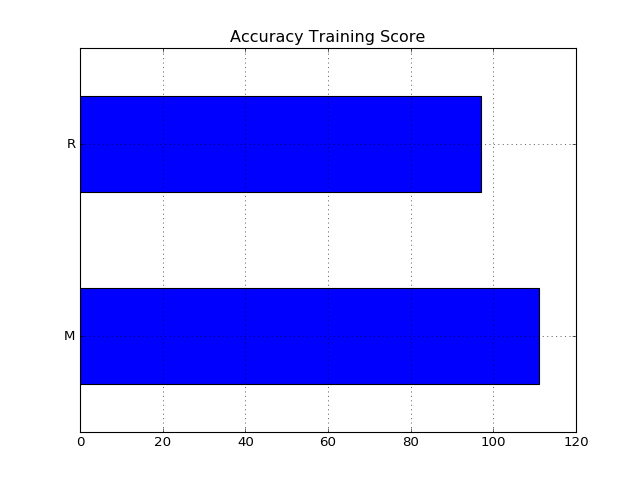

In [6]:
%matplotlib notebook
main_df[60].value_counts().plot(kind='barh');

There are not much difference between the classes proportion, so I will not apply any rebalance to it.

I choose to split the inputs (first 59 columns) and targets (column 60 dummie data) for then use it as the model inputs and outputs.

First the inputs.

In [8]:
inputs_df = main_df.drop(60, axis=1)
inputs_df.head()

0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      50      51      52      53      54      55      56  \
0  0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180   
1  0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
2  0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
3  0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
4  0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   

       57      58      59  
0  0.0084  0.0090  0.0032  
1  0.0049  0.0052  0.0044  
2  0.0164  0.0095  0.0078  
3  0.0044  0.0040  0.0117  
4  0.0048  0.0107  0.0094  

[5 rows x 60 columns]

Get the [dummy data for our classification column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), creates a new column for each class representing if the row belongs to the column class (1) or not (0).

Then the outputs.

In [9]:
targets_df = pd.get_dummies(main_df[60])
targets_df

M  R
0    0  1
1    0  1
2    0  1
3    0  1
4    0  1
5    0  1
6    0  1
7    0  1
8    0  1
9    0  1
10   0  1
11   0  1
12   0  1
13   0  1
14   0  1
15   0  1
16   0  1
17   0  1
18   0  1
19   0  1
20   0  1
21   0  1
22   0  1
23   0  1
24   0  1
25   0  1
26   0  1
27   0  1
28   0  1
29   0  1
..  .. ..
178  1  0
179  1  0
180  1  0
181  1  0
182  1  0
183  1  0
184  1  0
185  1  0
186  1  0
187  1  0
188  1  0
189  1  0
190  1  0
191  1  0
192  1  0
193  1  0
194  1  0
195  1  0
196  1  0
197  1  0
198  1  0
199  1  0
200  1  0
201  1  0
202  1  0
203  1  0
204  1  0
205  1  0
206  1  0
207  1  0

[208 rows x 2 columns]

For the targets we have now the columns 'R' wich stand for Rock and 'M' for Mine.

For these columns we have the values 1 for "belongs to" and 0 for "doesn't belongs to" the column class.

I choose to split it into two Series object in a way for me to test the classification results for each one.

In [10]:
rock_y_df = targets_df['R']
mine_y_df = targets_df['M']

We must then [split our data into train and test](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for we to be able to measure the model generalization as we predict unseen data by the model.

This step has a great impact on the model selection stage.

I choose to predict 1 if its a mine and 0 if its a rock.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_df, mine_y_df, test_size=0.30, random_state=42)

We will use [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) for feature creation as we are dealing with numerical data.

Then we will use [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) with the feature creator and the classifier we choose ahead to get our predictions done.


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# For feature creation
poly = PolynomialFeatures(2)

We will import some sklearn classifiers, test them and select the best one to use in our problem.

In [13]:
#Importing classifiers
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

Time to declare our classification models for testing and then choose the one with better generalization.

In [14]:
classifiers_ = [
    ("AdaBoost",AdaBoostClassifier()),
    ("Decision Tree", DecisionTreeClassifier(max_depth=10)),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Linear SVM", SVC(kernel="linear", C=0.025,probability=True)),
    ("Naive Bayes",GaussianNB()),
    ("Nearest Neighbors",KNeighborsClassifier(3)),
    ("Neural Net",MLPClassifier(alpha=1)),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1)),
    ("RBF SVM",SVC(gamma=2, C=1,probability=True)),
    ("SGDClassifier", SGDClassifier(max_iter=1000, tol=10e-3,penalty='elasticnet'))
    ]

Train each Classifier to take its training results.

In [15]:
clf_names = []
train_scores = []
test_scores = []
for n,clf in classifiers_:
    clf_names.append(n)
    # Model declaration with pipeline
    clf = Pipeline([('POLY', poly),('CLF',clf)])
    
    # Model training
    clf.fit(X_train, y_train)
    print(n+" training done!")
    
    # Measure training accuracy and score
    train_scores.append(clf.score(X_train, y_train))
    print(n+" training score done!")
    
    # Measure test accuracy and score
    test_scores.append(clf.score(X_test, y_test))
    print(n+" testing score done!")
    print("---")

AdaBoost training done!
AdaBoost training score done!
AdaBoost testing score done!
---
Decision Tree training done!
Decision Tree training score done!
Decision Tree testing score done!
---
Gaussian Process training done!
Gaussian Process training score done!
Gaussian Process testing score done!
---
Linear SVM training done!
Linear SVM training score done!
Linear SVM testing score done!
---
Naive Bayes training done!
Naive Bayes training score done!
Naive Bayes testing score done!
---
Nearest Neighbors training done!
Nearest Neighbors training score done!
Nearest Neighbors testing score done!
---


/home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Neural Net training done!
Neural Net training score done!
Neural Net testing score done!
---
QDA training done!
QDA training score done!
QDA testing score done!
---
Random Forest training done!


/home/auraham/.virtualenvs/keras/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest training score done!
Random Forest testing score done!
---
RBF SVM training done!
RBF SVM training score done!
RBF SVM testing score done!
---
SGDClassifier training done!
SGDClassifier training score done!
SGDClassifier testing score done!
---


We can plot each one results for comparing.

In [18]:
train_scores
clf_names

['AdaBoost',
 'Decision Tree',
 'Gaussian Process',
 'Linear SVM',
 'Naive Bayes',
 'Nearest Neighbors',
 'Neural Net',
 'QDA',
 'Random Forest',
 'RBF SVM',
 'SGDClassifier']

In [16]:
#Plot results
plt.title('Accuracy Training Score')
plt.grid()
plt.plot(train_scores,clf_names)
plt.show()

plt.title('Accuraccy Test Score')
plt.grid()
plt.plot(test_scores,clf_names)
plt.show()

ValueError: could not convert string to float: 'AdaBoost'

From the 11 classifiers we used, 7 got overfitting with 100% accuracy on the train data, but the test score shows us that only a few of them was able to generalize the problem.

As seen in the Test Score results, the Gaussian Process shows better generalization, followed by the methods of Artificial Neural Networks, K-Neares Neighbors then SGD.

We will then train a model using Gaussian Process method together with Polynomial Features as it shows better results for this experiment.

In [19]:
rng = np.random.RandomState(1)

clf = GaussianProcessClassifier(1.0 * RBF(1.0))

clf = Pipeline([('POLY', poly),
                ('ADABOOST', clf)])

# Training our model
%time clf.fit(X_train, y_train)

CPU times: user 1.44 s, sys: 1.16 s, total: 2.6 s
Wall time: 708 ms


Pipeline(memory=None,
         steps=[('POLY',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ADABOOST',
                 GaussianProcessClassifier(copy_X_train=True,
                                           kernel=1**2 * RBF(length_scale=1),
                                           max_iter_predict=100,
                                           multi_class='one_vs_rest',
                                           n_jobs=None, n_restarts_optimizer=0,
                                           optimizer='fmin_l_bfgs_b',
                                           random_state=None,
                                           warm_start=False))],
         verbose=False)

Measure its performance on the training set.

In [20]:
clf.score(X_train, y_train)

1.0

It shows a kind of overfitting, where its high complexity makes it fit the the whole training dataset.

It can become a problem depending on the context that you're dealing with, but first lets check its score on the test dataset.

In [21]:
clf.score(X_test, y_test)

0.9206349206349206

The accuraccy of 92% on the test dataset shows that the model was able to generalize well for the task of classifying if the observation is a rock or a mine.

Lets count how much mines our classifier points in the test dataset.

In [22]:
clf.predict(X_test).sum()

38

Lets count how much there really is.

In [23]:
y_test.sum()

35


For better conclusions is a good choice to plot a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) for better describing our model accuracy on both: train and test data.

In [24]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, X_train, y_train,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Train results: confusion matrix')
print(disp.confusion_matrix)

ImportError: cannot import name 'plot_confusion_matrix'

The training dataset confusion matrix shows that it has 100% accuray, correct classifying each observation.

We must then take measurements on the confusion matrix of the test data:

Test results: confusion matrix
[[24  4]
 [ 1 34]]


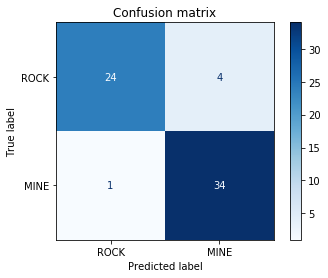

In [20]:
disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Test results: confusion matrix')
print(disp.confusion_matrix)

Our model wrong predicted some samples on the test dataset.

The model predicted some rocks as mines, and no one would be in danger, no stone would explode by being carefull to disarm it.

The other hand it predicted some mines as rock and it may put people life in danger if dealing with the task of predicting real mines even though the chances are low.

One available solution, if the risk is not worth, is to use this predictor attached to a robot to avoid injuries.

# TODO
- [x] Hacer un pipeline con los metodos descritos por jason para transformar las distribuciones a algo mas gausiano
- [x] Comparar el mejor clasificador de este notebook 


```
rng = np.random.RandomState(1)

clf = GaussianProcessClassifier(1.0 * RBF(1.0))

clf = Pipeline([('POLY', poly),
                ('ADABOOST', clf)])

# Training our model
%time clf.fit(X_train, y_train)

0.9206349206349206
```

con el mejor clasificador en el notebook 'sonar-mines' 

``` svm
Best: 0.867470 using {'C': 1.5, 'kernel': 'rbf'}
```